In [201]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")
df = df.iloc[1:].reset_index(drop=True)

In [202]:
print("Total Divisions:", df["Q24_1"].nunique())
df["Q24_1"].unique()

Total Divisions: 44


array(['Finance', 'Strategy', 'IT', 'Logistics', 'Procurement',
       'Merchandise Management', 'Global eCommerce', 'Other',
       'Human Resources', 'Construction & Facility Management',
       'Retail Store', 'Controlling', 'Retail Operations',
       'Sustainability', 'Legal', 'No answer',
       'Product Development & Operations', 'Business Unit BOSS Menswear',
       'Corporate Communications', 'Marketing & Brand Communications',
       'Business Unit HUGO', 'Business Units Ticino', 'Global Retail',
       'eCommerce', 'Business Unit BOSS Womenswear', 'Internal Audit',
       'Technical Center', 'Retail Management', 'Licences',
       'Sourcing & Production', 'Store Design & Visual Merchandising',
       'Materials Management', 'Global Travel Retail', 'Retail Services',
       'Digital Excellence', 'Production Izmir - Jersey',
       'Production Izmir - Womenswear',
       'Production Izmir- Menswear (Suit)', 'Production Izmir - Shirt',
       'Real Estate Management', "Log. Dis

In [203]:
count = df["Q24_1"].value_counts()
count

Q24_1
Business Unit BOSS Menswear               411
Retail Store                              239
Other                                     229
Production Izmir- Menswear (Suit)         187
Human Resources                           148
Product Development & Operations          129
IT                                        122
Logistics                                 114
Business Units Ticino                      99
No answer                                  97
Business Unit BOSS Womenswear              83
Production Izmir - Jersey                  82
Production Izmir - Womenswear              67
Business Unit HUGO                         67
Retail Management                          64
Production Izmir - Shirt                   60
Finance                                    59
Procurement                                56
Merchandise Management                     54
Technical Center                           40
Marketing & Brand Communications           38
Store Design & Visual Mercha

In [204]:
df_to_keep = count[count > 50].index
df = df[df["Q24_1"].isin(df_to_keep)]

df = df[~df['Q24_1'].isin(['Other', 'No answer'])]
# df.dropna(inplace=True)

df.shape

(2041, 40)

In [205]:
# Columns that talk about how well a certain quality is reflected in the division
qualities_columns = ["Q8", "Q10", "Q12", "Q14", "Q16", "Q18"]
division_column = "Q24_1"
extra_columns = ["Q37", "Q25", "Q26", "Q27", "Q23_1"]
df = df[qualities_columns + [division_column] + extra_columns]

null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

# Define a mapping from categorical responses to numerical values
response_mapping = {
    "Very poor": 1,
    "Poor": 2,
    "Satisfactory": 3,
    "Well": 4,
    "Very well": 5,
    "No answer": None,
}

Shape:  (2041, 12)
Null values in each column:
 Q8        7
Q10       5
Q12       9
Q14      12
Q16       6
Q18       6
Q24_1     0
Q37      57
Q25      20
Q26      11
Q27      20
Q23_1     0
dtype: int64


In [206]:
df.columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
    "Division",
    "Occupational Group",
    "Leadership Position",
    "Tenure",
    "Age",
    "Country"
]
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,Satisfactory,Satisfactory,Well,Satisfactory,Well,Poor,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
2,No answer,Very poor,Very poor,Very poor,Very poor,Very poor,IT,White Collar,No,5-10 years,27 - 34,Germany
3,Poor,Well,Poor,Satisfactory,Very poor,Poor,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,Very well,Very well,Very well,Well,Very well,Well,Procurement,No answer,No,1-3 years,27 - 34,Switzerland
5,Well,Poor,Satisfactory,Satisfactory,Well,Well,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany


In [207]:
# Convert categorical responses to numerical values for quality columns
qualities_columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
]

for quality in qualities_columns:
    df[quality] = df[quality].map(response_mapping)
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,3.0,3.0,4.0,3.0,4.0,2.0,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
2,NaN,1.0,1.0,1.0,1.0,1.0,IT,White Collar,No,5-10 years,27 - 34,Germany
3,2.0,4.0,2.0,3.0,1.0,2.0,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,5.0,5.0,5.0,4.0,5.0,4.0,Procurement,No answer,No,1-3 years,27 - 34,Switzerland
5,4.0,2.0,3.0,3.0,4.0,4.0,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany


In [208]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

Shape:  (1885, 12)
Null values in each column:
 TRUST                     0
ENTREPRENEURIAL SPIRIT    0
YOUTHFUL SPIRIT           0
SIMPLICITY & QUALITY      0
TEAM MENTALITY            0
PERSONAL OWNERSHIP        0
Division                  0
Occupational Group        0
Leadership Position       0
Tenure                    0
Age                       0
Country                   0
dtype: int64


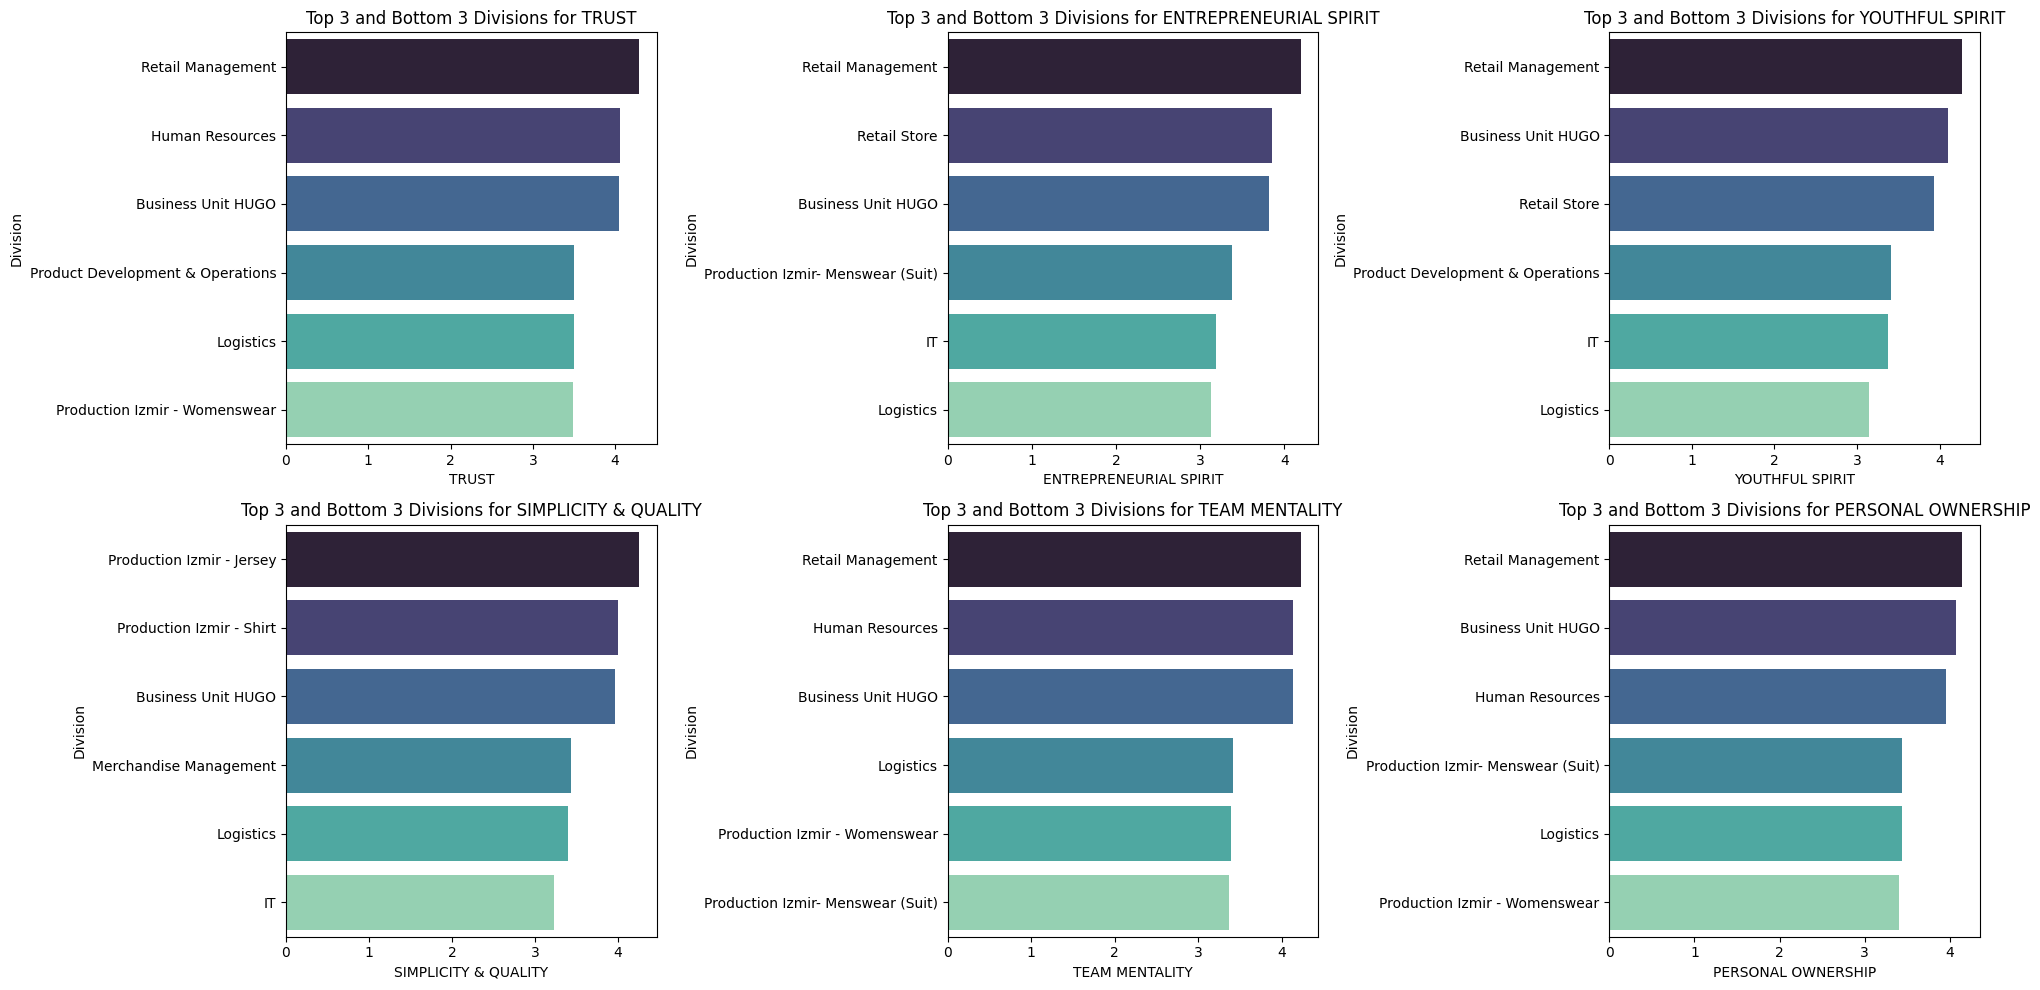

In [209]:
country_data = df[qualities_columns + ['Division']]
country_data = country_data.groupby('Division').mean().reset_index()

# Function to get top 5 and bottom 6 for each quality (column)
def get_top_bottom(df, column):
    sorted_df = df[["Division", column]].sort_values(by=column, ascending=False)
    top_5 = sorted_df.head(3)
    bottom_6 = sorted_df.tail(3)
    combined_df = pd.concat([top_5, bottom_6])
    return combined_df


# Create subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each column and assign each plot to a subplot
for i, col in enumerate(
    qualities_columns
):  # Loop over qualities columns list
    # Get top 5 and bottom 6 for the current column
    top_bottom_df = get_top_bottom(country_data, col)

    # Plot in the corresponding subplot
    sns.barplot(
        x=col, y="Division", data=top_bottom_df, palette="mako", ax=ax[i // 3, i % 3]
    )
    ax[i // 3, i % 3].set_title(f"Top 3 and Bottom 3 Divisions for {col}")
    ax[i // 3, i % 3].set_xlabel(col)
    ax[i // 3, i % 3].set_ylabel("Division")

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [216]:
extracted_data = df[df['Division'].isin(['Retail Management', 'Business Unit HUGO', 'Logistics', 'IT'])]
age_grouped_data = extracted_data.groupby(["Division", "Age"])[qualities_columns].mean()

Descriptive Stats

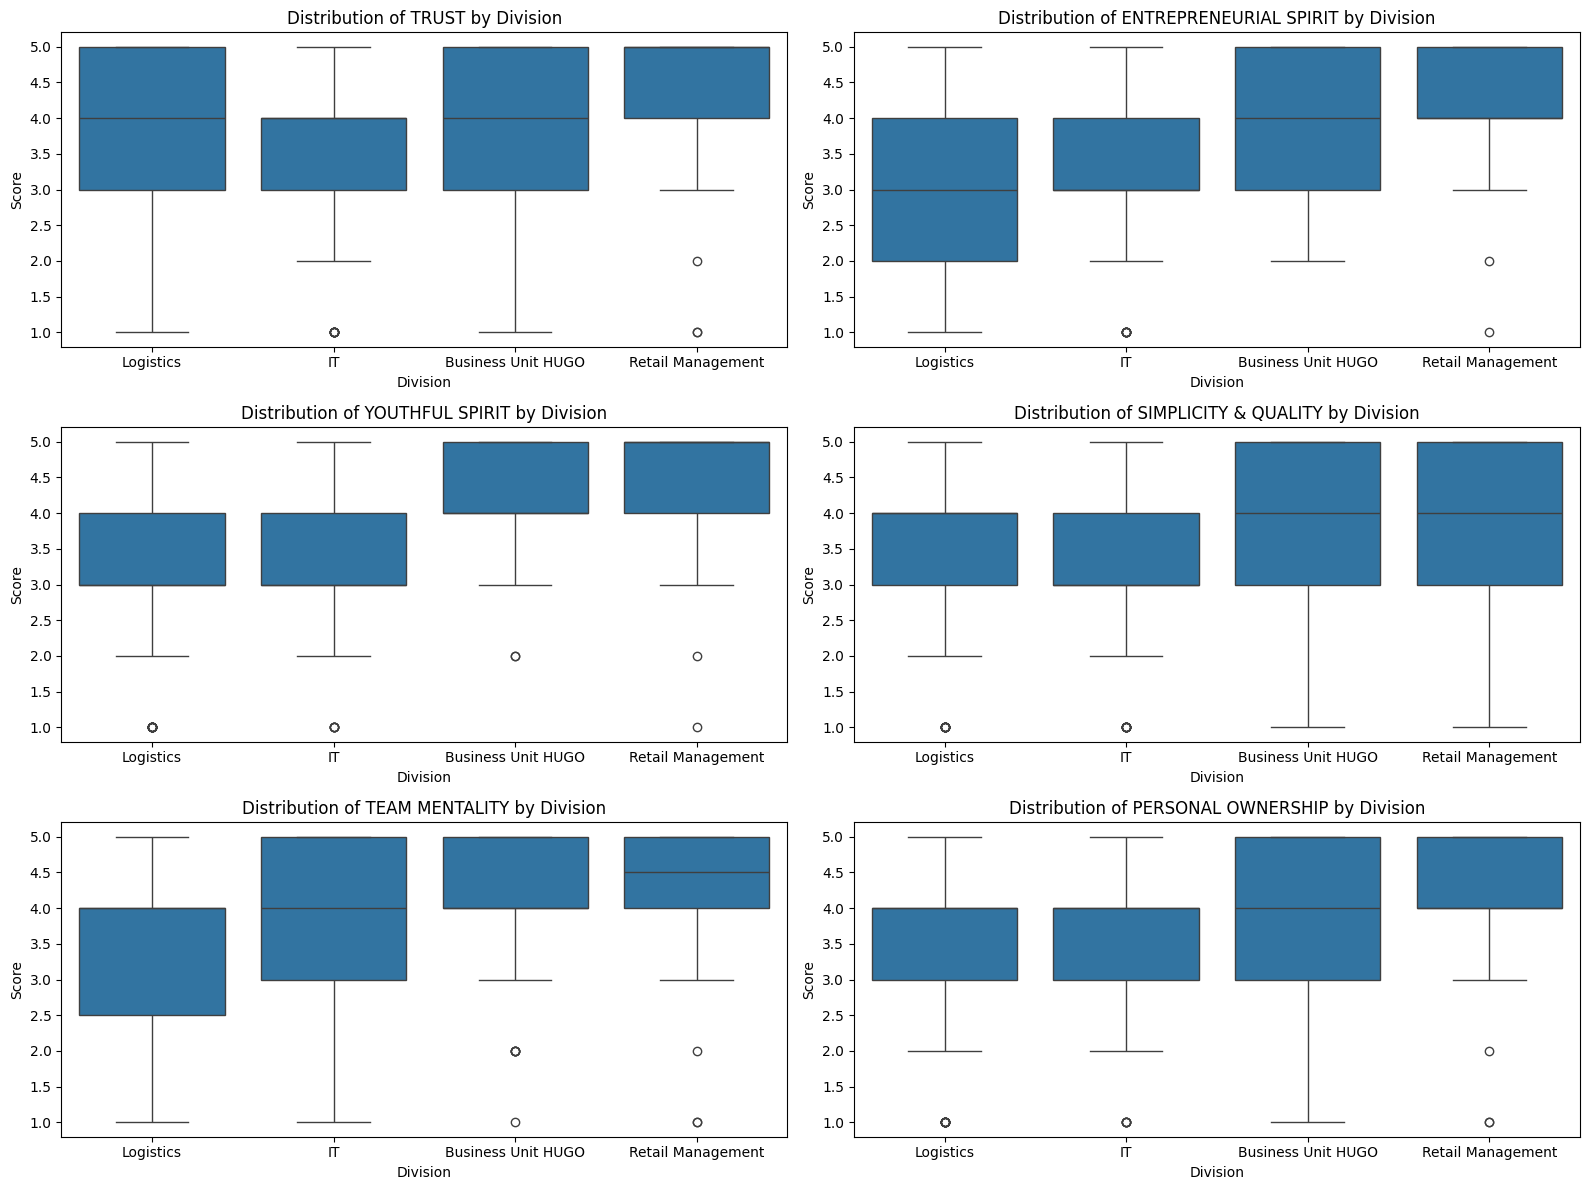

In [225]:
import seaborn as sns

plt.figure(figsize=(16, 12))

for i, quality in enumerate(qualities_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Division', y=quality, data=extracted_data)
    plt.title(f'Distribution of {quality} by Division')
    plt.ylabel('Score')
    plt.xlabel('Division')

plt.tight_layout()
plt.show()

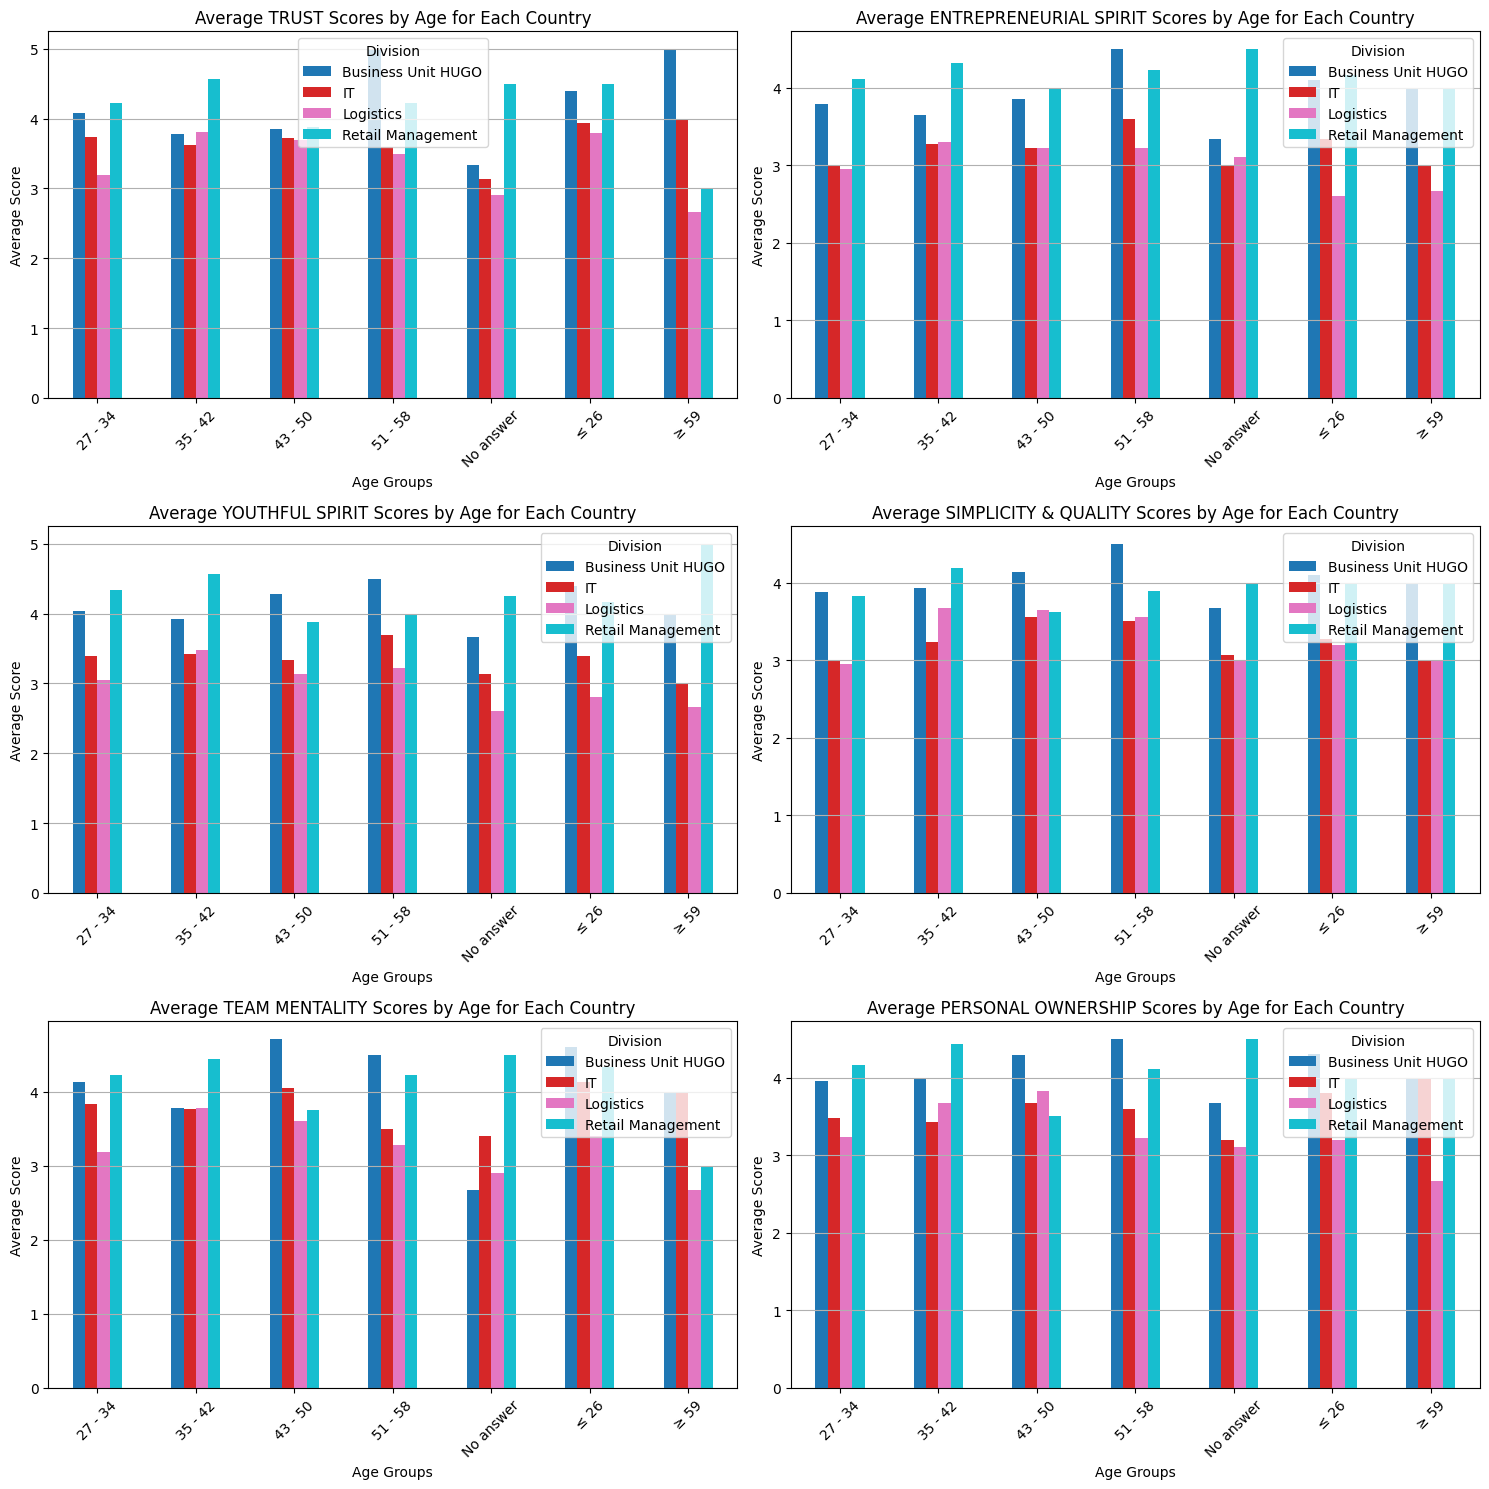

In [217]:
import numpy as np
def get_analysis(grouped_data):

    n_qualities = len(qualities_columns)
    countries = grouped_data.index.levels[0]  # List of unique countries
    n_rows = (n_qualities + 1) // 2  # Two plots per row

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    # Step 4: Create a color map for countries
    colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

    # Step 5: Loop through each quality and plot for each country
    for i, quality in enumerate(qualities_columns):
        # Step 6: Unstack the data for the current quality
        quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

        # Step 7: Plot each country's data with specific colors
        quality_data.plot(kind='bar', ax=axes[i], color=colors)
        
        axes[i].set_title(f'Average {quality} Scores by Age for Each Country')
        axes[i].set_xlabel('Age Groups')
        axes[i].set_ylabel('Average Score')
        axes[i].set_xticklabels(quality_data.index, rotation=45)
        axes[i].grid(axis='y')

    # Hide any empty subplots if necessary
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

get_analysis(age_grouped_data)

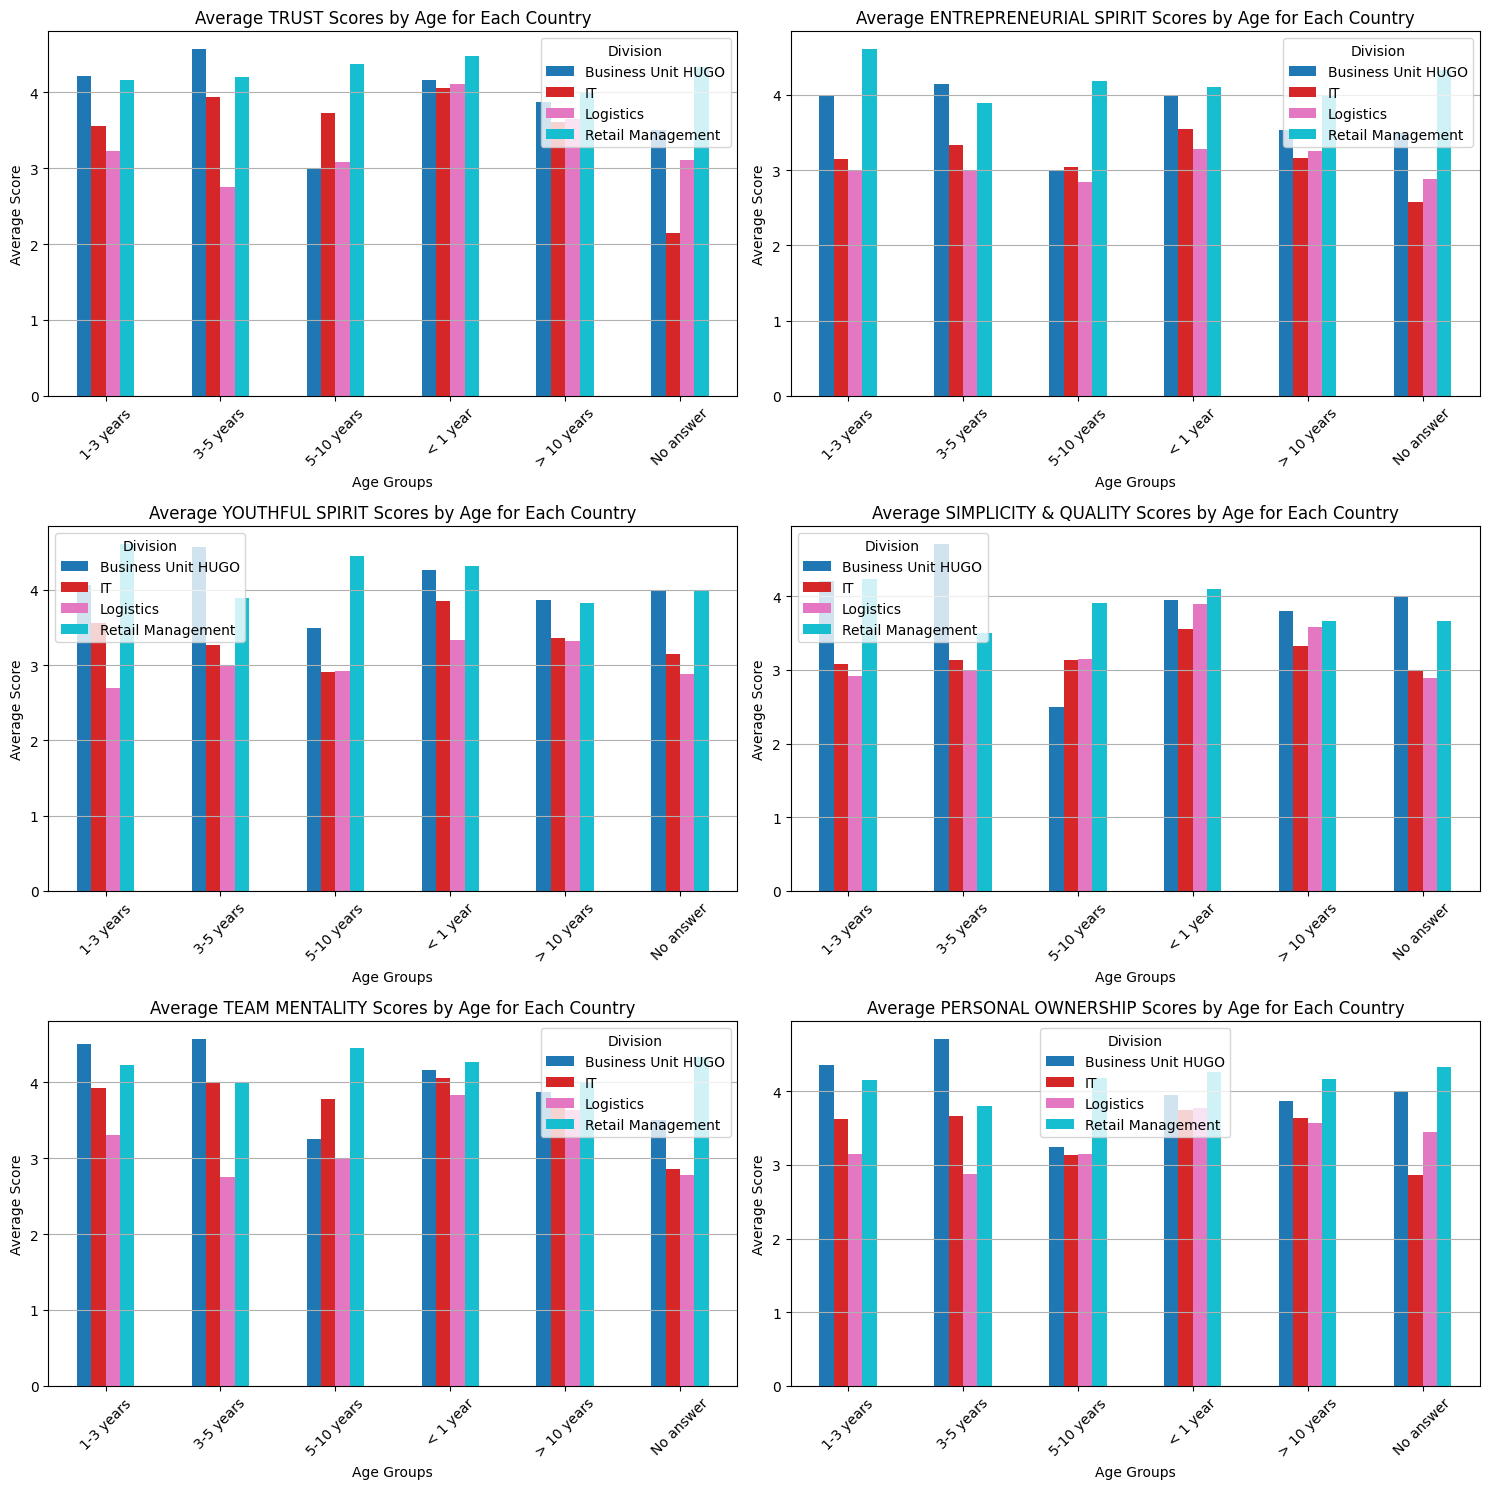

In [218]:
tenure_grouped_data = extracted_data.groupby(["Division", "Tenure"])[qualities_columns].mean()
get_analysis(tenure_grouped_data)


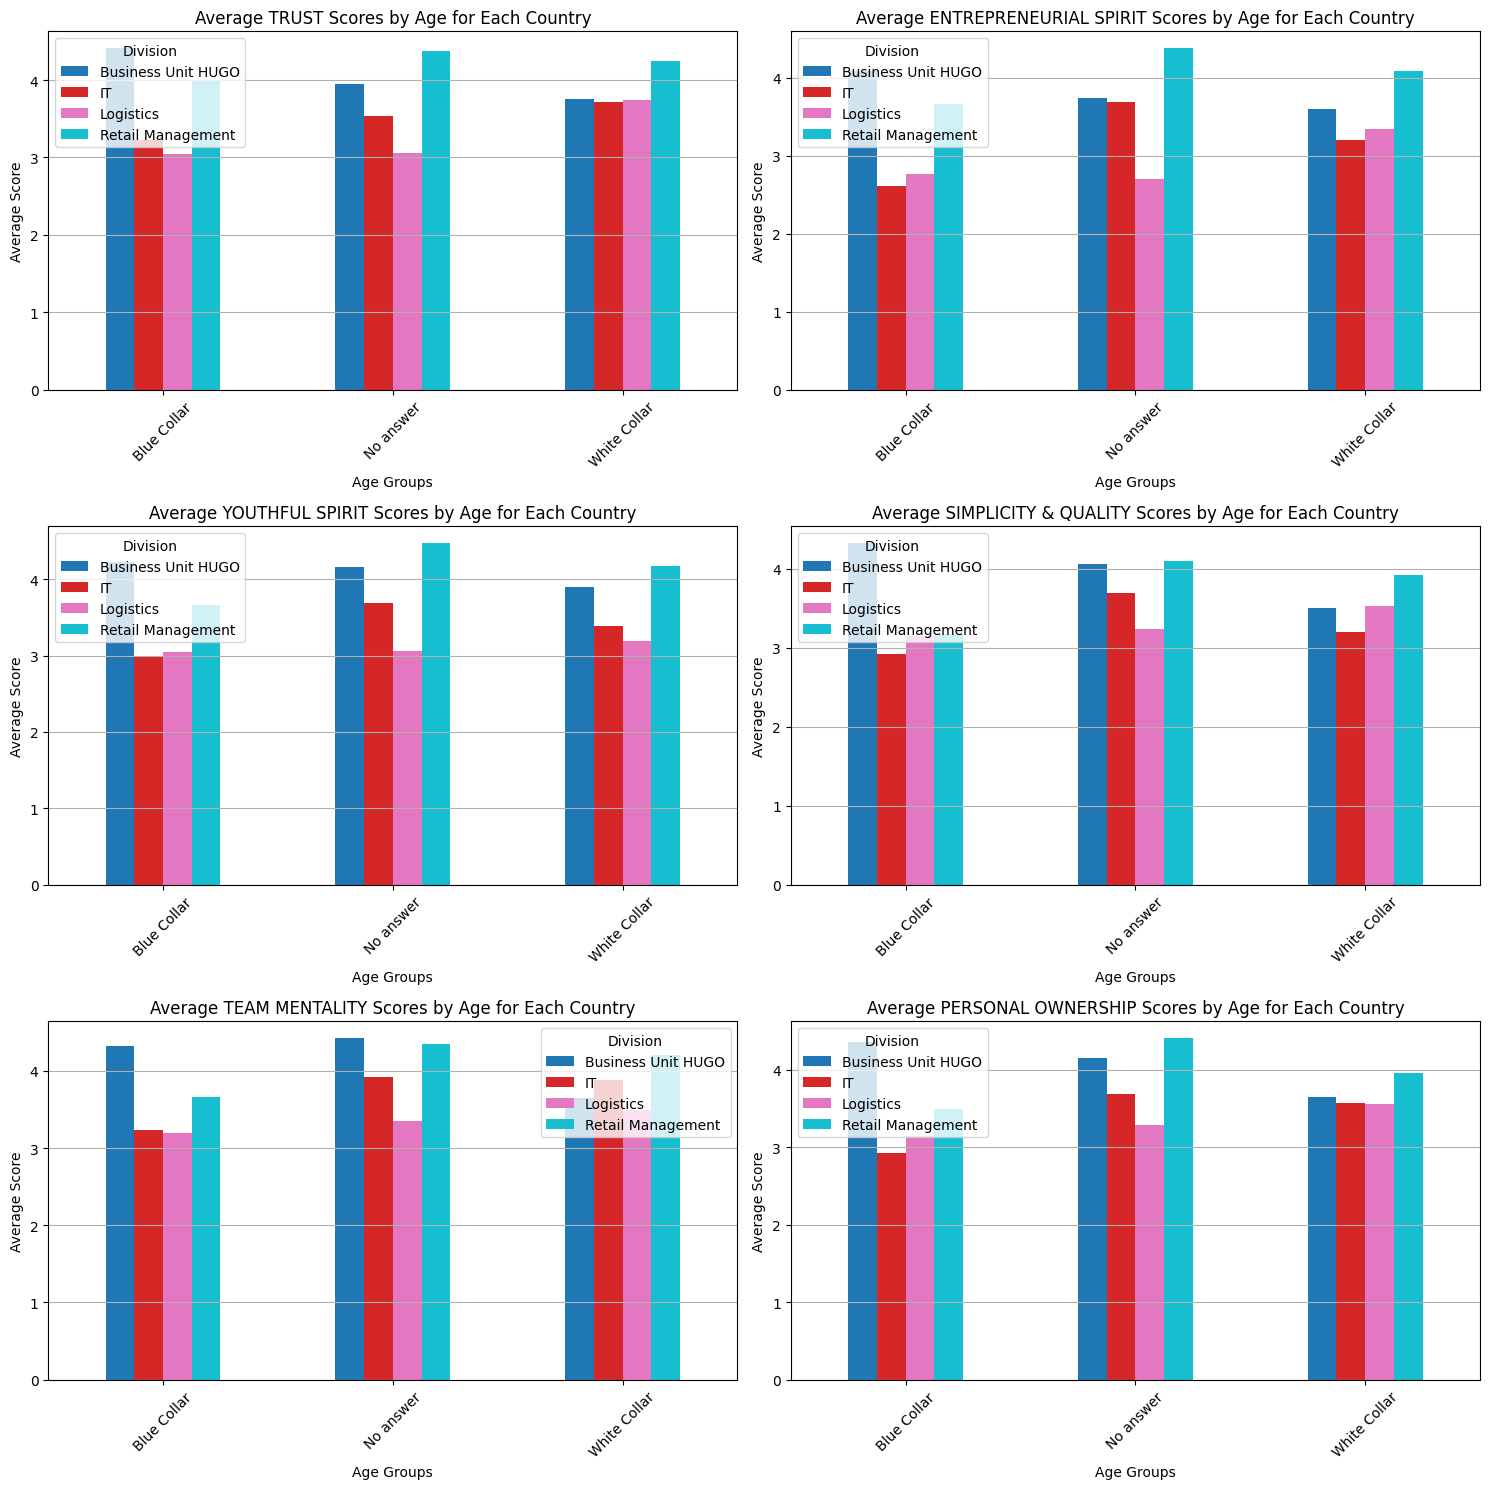

In [219]:
og_grouped_data = extracted_data.groupby(["Division", "Occupational Group"])[qualities_columns].mean()
get_analysis(og_grouped_data)